# Animating a Scatterplot

In [1]:
# general setup
import pandas as pd
import matplotlib as plt

%matplotlib

Using matplotlib backend: MacOSX


## Load in data

In [2]:
fert = pd.read_csv('gapminder_total_fertility.csv', index_col = 0)
# using index_col = 0 will use the countries as indices instead of as the first column, saving hassle further down
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col = 0)
pop = pd.read_excel('gapminder_population.xlsx', index_col = 0)

In [3]:
# In fert, columns contain strings. In life, columns contain integers. So we need to re-create fert columns as integers to match up.

# for every cell in the columns of fert, apply integer function
# original 
ncol = [int(x) for x in fert.columns]
# a different alternative:
# ncol = [int(fert.columns[x]) for x in range(1,len(fert.columns))]

fert.set_axis(axis = 1, labels = ncol, inplace = True)

## Instead, use hierarchical indices from .stack()

In [4]:
sfert = fert.stack() # creates object of type pd.Series
slife = life.stack()
spop = pop.stack()

In [5]:
# convert multiple pd.Series into pd.DataFrame using dictionary

d = {'fertility': sfert, 'lifeexp': slife, 'pop': spop}
df2 = pd.DataFrame(data = d)
df2.tail(11)

fertility  lifeexp      pop
Åland 2000        NaN    80.00  25813.0
      2001        NaN    80.83  26014.0
      2002        NaN    81.80  26204.0
      2003        NaN    80.63  26378.0
      2004        NaN    79.88  26530.0
      2005        NaN    80.00  26766.0
      2006        NaN    80.10  26923.0
      2007        NaN      NaN  26923.0
      2008        NaN      NaN  26923.0
      2009        NaN      NaN  26923.0
      2010        NaN      NaN  26923.0

In [6]:
# interpret all indices (rows & cols) as row indices
df3 = df2.stack()
df3.head(5)

Afghanistan  1800  fertility          7.00
                   lifeexp           28.21
                   pop          3280000.00
             1801  fertility          7.00
                   lifeexp           28.20
dtype: float64

In [7]:
# now convert back from long to wide format
# use 1st (country name) and 3rd (attribute) level of index as columns
df4 = df3.unstack((0,2))
df4.head(5)

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp        pop                   pop fertility lifeexp   
1800         7.0   28.21  3280000.0                   NaN       4.6    35.4   
1801         7.0   28.20        NaN                   NaN       4.6    35.4   
1802         7.0   28.19        NaN                   NaN       4.6    35.4   
1803         7.0   28.18        NaN                   NaN       4.6    35.4   
1804         7.0   28.17        NaN                   NaN       4.6    35.4   

                 Algeria                     ...      Yemen Yugoslavia  \
           pop fertility lifeexp        pop  ...        pop        pop   
1800  410445.0      6.99   28.82  2503218.0  ...  2593000.0        NaN   
1801       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1803       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1804       NaN      6.99   28.82        NaN  ...        NaN        NaN   

        Zambia                    Zimbabwe                    Åland          
     fertility lifeexp       pop fertility lifeexp        pop   pop lifeexp  
1800      6.71    32.6  747000.0      6.75    33.7  1085814.0   NaN     NaN  
1801      6.71    32.6       NaN      6.75    33.7        NaN   NaN     NaN  
1802      6.71    32.6       NaN      6.75    33.7        NaN   NaN     NaN  
1803      6.71    32.6       NaN      6.75    33.7        NaN   NaN     NaN  
1804      6.71    32.6       NaN      6.75    33.7        NaN   NaN     NaN  

[5 rows x 667 columns]

## Plotting using Pylab

In [8]:
# plot some specific columns
import pylab as plt

df4[['Germany', 'France', 'Afghanistan']].plot()

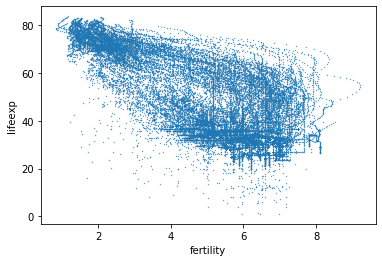

In [20]:
# make a scatterplot

# first extract columns from df3
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)

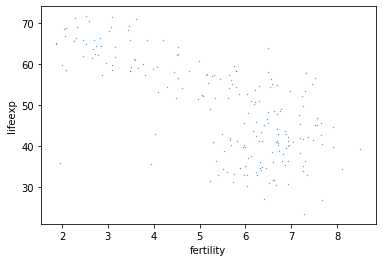

In [17]:
# use stacking to select a specific year

df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

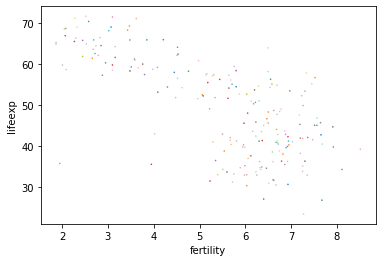

In [18]:
# Make it pretty!

cmap = plt.get_cmap('tab20', lut = len(df6)).colors
# lut controls length of colour array. Default is 20, but we want it to be the same length as our no. of countries, so we are going to make sure it's the same length as the data frame by using lut = len(df6)
df6.plot.scatter('fertility', 'lifeexp', s=0.3, c = cmap)

   ## Replot using matplotlib

source/inspo: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
df6.head(10)

,fertility,lifeexp,pop
Afghanistan,7.67,26.85,7752118.0
Akrotiri and Dhekelia,NaN,NaN,10661.0
Albania,5.80,54.48,1263171.0
Algeria,7.65,42.77,8872247.0
American Samoa,NaN,NaN,18937.0
Andorra,NaN,NaN,6197.0
Angola,6.93,30.70,4354882.0
Anguilla,NaN,NaN,5121.0
Antigua and Barbuda,4.45,57.97,46301.0
Argentina,3.16,61.61,17150335.0


Text(0, 0.5, 'Life Expectancy (Years)')

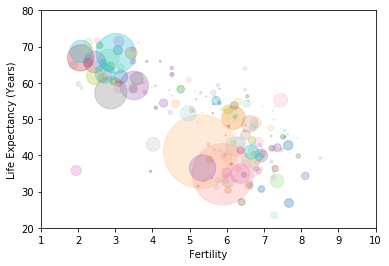

In [14]:
# set up parameters for using in plot generation
x = df6['fertility']
y = df6['lifeexp']
sizes = df6['pop']/10**5 # in 100k units (otherwise will overwhelm the scale)

fig = plt.scatter(x, y,
            s = sizes,
            c = cmap,     # cmap was defined above: override default len of 20 colours
            alpha=0.3)

plt.axis([1, 10, 20, 80])
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy (Years)')

## Make a loop to generate all of the plots

In [15]:
# stack and unstack for individual year
year_list = list(range(1960, 2016))
df_initial = df3.unstack(1)

# Write a function that will create the plots
def makePlot(df_initial, year):
    
    # select data for the year we are interested in
    df_temp = df_initial[year]
    df_temp = df_temp.unstack(1)
    
    # set some variables that will always be the same across all plots
    x = df_temp['fertility']
    y = df_temp['lifeexp']
    sizes = df_temp['pop']/10**5 # in 100k units (otherwise will overwhelm the scale)
    cmap = plt.get_cmap('tab20', lut = len(df_temp)).colors

    # generate plot
    fig = plt.scatter(x, y,
                s = sizes,
                c = cmap,     # cmap was defined above: override default len of 20 colours
                alpha=0.3)

    plt.axis([1, 10, 20, 80])
    plt.xlabel('Fertility')
    plt.ylabel('Life Expectancy (Years)')
    plt.title(str(year))

    # save plot
    plt.savefig('scatter_' + str(year) + '.png', dpi = 150)
    plt.clf()       # close the plot we created, or they will all get overlaid
    
    return


### now loop through all of the years in the year list!
for moment in year_list:
    makePlot(df_initial, moment)

<Figure size 432x288 with 0 Axes>

## Create gif out of all these pretty plots

In [16]:
# code from Kristian's textbook

import imageio

images = []

for i in range(1960, 2015):
    filename = 'scatter_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)